<a href="https://www.kaggle.com/code/sivarajsingh/sales-forecasting-prediction?scriptVersionId=165418935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import os 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/colorsetup1/colorsetup.py
/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import sys, os
sys.path.append('/kaggle/input/colorsetup1/colorsetup.py')
with open('/kaggle/input/colorsetup1/colorsetup.py', 'r') as file:
    #exec(file.read())
    colord = file.read()
exec(colord)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import colors, palette
sns.set_palette(palette)

#Time Series Related Libraries
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [3]:
sales_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
sales_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
#stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
#stores

In [5]:
print(f'Total Number of Observation {len(sales_data)}')

Total Number of Observation 3000888


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
sales_test_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')

In [8]:
display(sales_test_data)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [9]:
sales_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [10]:
# Change the format for Date 
sales_data['date'].isnull().sum()
sales_data['date'] = pd.to_datetime(sales_data['date'])

In [11]:
sales_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [12]:
sales_data['family'].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [13]:
sales_data['store_nbr'].value_counts()

store_nbr
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: count, dtype: int64

In [14]:
sales_data.groupby(['family','store_nbr']).count()['id']

family      store_nbr
AUTOMOTIVE  1            1684
            2            1684
            3            1684
            4            1684
            5            1684
                         ... 
SEAFOOD     50           1684
            51           1684
            52           1684
            53           1684
            54           1684
Name: id, Length: 1782, dtype: int64

In [15]:
# Check the Count of Unique Category
len(sales_data.query('family == "SEAFOOD" & store_nbr == 1'))

1684

In [16]:
#Check the Missing Data Range
df = sales_data.query('family == "SEAFOOD" & store_nbr == 3')

In [17]:
df.set_index('date',inplace=True)

In [18]:
df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,758,3,SEAFOOD,0.000000,0
2013-01-02,2540,3,SEAFOOD,169.064000,0
2013-01-03,4322,3,SEAFOOD,98.050995,0
2013-01-04,6104,3,SEAFOOD,115.216995,0
2013-01-05,7886,3,SEAFOOD,108.505005,0
...,...,...,...,...,...
2017-08-11,2992736,3,SEAFOOD,94.312996,7
2017-08-12,2994518,3,SEAFOOD,71.917000,0
2017-08-13,2996300,3,SEAFOOD,77.398000,0


In [19]:
## Frequency is None for this Date Range
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

### Date Index Ranges from 2013 - 2017 --> 5 Years Data

In [20]:
expected_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')  # Adjust frequency as needed
#missing_dates = expected_dates.difference(your_dataframe.index)

In [21]:
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [22]:
print(f'Expected Date Range {len(expected_dates)}')
print(f'Observed Date Range {len(df)}')

Expected Date Range 1688
Observed Date Range 1684


In [23]:
# Missing Dates are holidays - Christmas
missing_dates = expected_dates.difference(df.index)
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

### Missing Dates are Holidays - Christmas

Text(0, 0.5, 'Unit Sales')

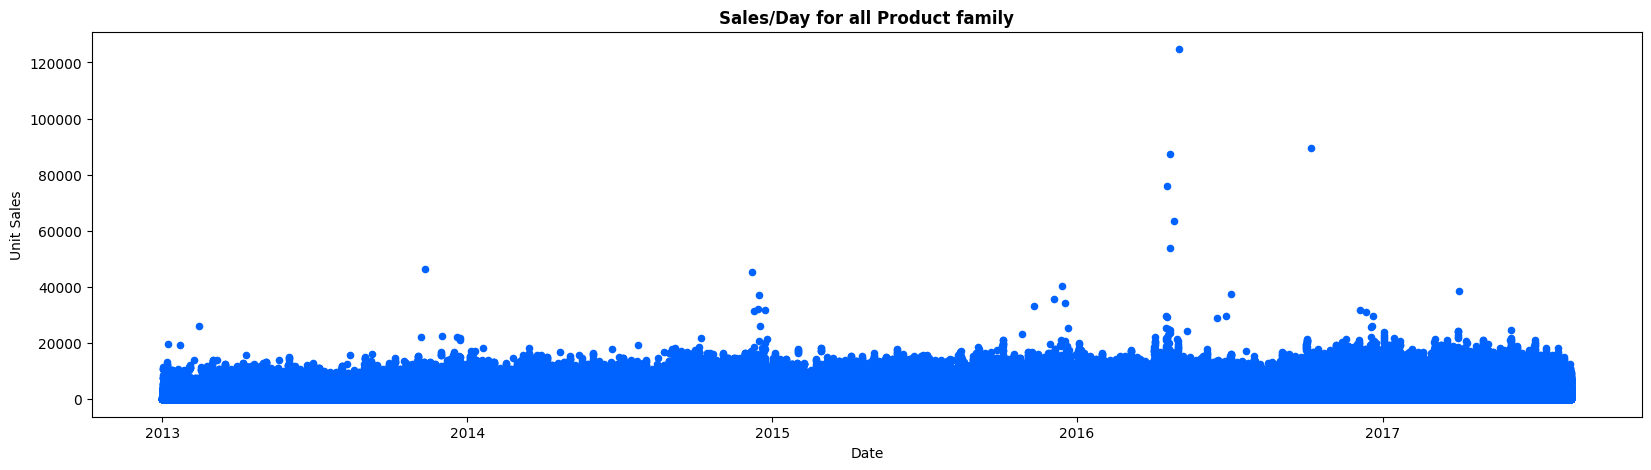

In [24]:
sales_data[['date','sales']].plot(x='date',y='sales',kind='scatter',figsize=(20,5))
plt.title('Sales/Day for all Product family',weight='bold')
plt.xlabel('Date')
plt.ylabel('Unit Sales')

### Insights
Average Sales around 17000 overall each day

In [25]:
#df['sales'].plot(figsize=(20,5))
#plt.grid()

In [26]:
train = sales_data.set_index('date',drop=False)

In [27]:
train.index.name = 'Date'

In [28]:
train

,id,date,store_nbr,family,sales,onpromotion
Date,,,,,,
2013-01-01,0,2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,2013-01-01,1,BABY CARE,0.000,0
2013-01-01,2,2013-01-01,1,BEAUTY,0.000,0
2013-01-01,3,2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,POULTRY,438.133,0
2017-08-15,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,2017-08-15,9,PRODUCE,2419.729,148


In [29]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='Date', length=3000888, freq=None)

In [30]:
## Group the Category
train = train.groupby(['date','family','store_nbr'])

In [31]:
#print(train[['sales','onpromotion']].sum().unstack().unstack().columns.to_list())

In [32]:
train['sales',].sum().unstack().unstack()

sales                                                \
store_nbr          1                                                  
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0      0.00000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0    470.65200   
2013-01-03        3.0       0.0    0.0     919.0   0.0    310.65500   
2013-01-04        3.0       0.0    3.0     953.0   0.0    198.36600   
2013-01-05        5.0       0.0    3.0    1160.0   0.0    301.05700   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0    145.60700   
2017-08-12        6.0       0.0    3.0    1659.0   0.0    243.22000   
2017-08-13        1.0       0.0    1.0     803.0   0.0    136.67900   
2017-08-14        1.0       0.0    6.0    2201.0   0.0    346.03800   
2017-08-15        4.0       0.0    4.0    1942.0   0.0    329.54102   

                                                 ...                       \
store_nbr                                        ...        54              
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES      MEATS   
date                                             ...                        
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0   0.000000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  73.771000   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  50.257000   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  40.223000   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  43.431000   
...                ...      ...    ...      ...  ...       ...        ...   
2017-08-11         4.0    341.0  343.0   64.302  ...       0.0  50.756000   
2017-08-12         3.0    351.0  526.0   99.488  ...       1.0  53.079002   
2017-08-13         1.0    169.0  266.0   47.770  ...       3.0  67.435000   
2017-08-14         4.0    571.0  699.0  154.578  ...       1.0  64.224000   
2017-08-15        21.0    703.0  602.0  116.402  ...       2.0  57.842000   

                                                                          \
store_nbr                                                                  
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS    POULTRY   
date                                                                       
2013-01-01           0.0          0.0                     0.0   0.000000   
2013-01-02         228.0          0.0                     0.0  15.514000   
2013-01-03         156.0          0.0                     0.0   4.313000   
2013-01-04         146.0          0.0                     0.0  26.743000   
2013-01-05         205.0          0.0                     0.0  31.118000   
...                  ...          ...                     ...        ...   
2017-08-11         155.0          0.0                     0.0  80.759000   
2017-08-12         169.0          0.0                     4.0  91.671000   
2017-08-13         244.0          0.0                     2.0  79.062996   
2017-08-14         200.0          0.0                     1.0  56.155000   
2017-08-15         169.0          0.0                     2.0  59.619000   

                                                                       
store_nbr                                                              
family     PREPARED FOODS  PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                   
2013-01-01            0.0    0.000                        0.0     0.0  
2013-01-02           61.0    0.000                        0.0     3.0  
2013-01-03            1.0    0.000                        0.0     2.0  
2013-01-04           38.0    0.000                        0.0     2.0  
2013-01-05           32.0    0.000                        0.0     1.0  
...  

In [33]:
train = train['sales'].sum().unstack().unstack()

In [34]:
train

store_nbr          1                                                 \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0      0.00000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0    470.65200   
2013-01-03        3.0       0.0    0.0     919.0   0.0    310.65500   
2013-01-04        3.0       0.0    3.0     953.0   0.0    198.36600   
2013-01-05        5.0       0.0    3.0    1160.0   0.0    301.05700   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0    145.60700   
2017-08-12        6.0       0.0    3.0    1659.0   0.0    243.22000   
2017-08-13        1.0       0.0    1.0     803.0   0.0    136.67900   
2017-08-14        1.0       0.0    6.0    2201.0   0.0    346.03800   
2017-08-15        4.0       0.0    4.0    1942.0   0.0    329.54102   

store_nbr                                        ...        54             \
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES      MEATS   
date                                             ...                        
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0   0.000000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  73.771000   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  50.257000   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  40.223000   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  43.431000   
...                ...      ...    ...      ...  ...       ...        ...   
2017-08-11         4.0    341.0  343.0   64.302  ...       0.0  50.756000   
2017-08-12         3.0    351.0  526.0   99.488  ...       1.0  53.079002   
2017-08-13         1.0    169.0  266.0   47.770  ...       3.0  67.435000   
2017-08-14         4.0    571.0  699.0  154.578  ...       1.0  64.224000   
2017-08-15        21.0    703.0  602.0  116.402  ...       2.0  57.842000   

store_nbr                                                                 \
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS    POULTRY   
date                                                                       
2013-01-01           0.0          0.0                     0.0   0.000000   
2013-01-02         228.0          0.0                     0.0  15.514000   
2013-01-03         156.0          0.0                     0.0   4.313000   
2013-01-04         146.0          0.0                     0.0  26.743000   
2013-01-05         205.0          0.0                     0.0  31.118000   
...                  ...          ...                     ...        ...   
2017-08-11         155.0          0.0                     0.0  80.759000   
2017-08-12         169.0          0.0                     4.0  91.671000   
2017-08-13         244.0          0.0                     2.0  79.062996   
2017-08-14         200.0          0.0                     1.0  56.155000   
2017-08-15         169.0          0.0                     2.0  59.619000   

store_nbr                                                              
family     PREPARED FOODS  PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                   
2013-01-01            0.0    0.000                        0.0     0.0  
2013-01-02           61.0    0.000                        0.0     3.0  
2013-01-03            1.0    0.000                        0.0     2.0  
2013-01-04           38.0    0.000                        0.0     2.0  
2013-01-05           32.0    0.000                        0.0     1.0  
...                   ...      ...                        ...     ...  
2017-08-11           54.0  546.250                        0.0     0.0  
2017-08-12           81.0  696.920                        0.0     1.0  
2017-08-13           91.0  877.304                        0.0     2.0

In [35]:
len(train)

1684

In [36]:
train.sum(axis=1).sort_values(ascending=False)

date
2017-04-01    1.463084e+06
2017-01-02    1.402306e+06
2017-06-04    1.376512e+06
2016-04-18    1.345921e+06
2017-05-01    1.306699e+06
                  ...     
2016-01-01    1.643339e+04
2015-01-01    1.277362e+04
2017-01-01    1.208250e+04
2014-01-01    8.602065e+03
2013-01-01    2.511619e+03
Length: 1684, dtype: float64

In [37]:
#train.sum(axis=1).plot(figsize=(15,5))
#plt.xlabel('Date')
#plt.ylabel('Unit Sales of All Product Family')

In [38]:
train[[(1,'AUTOMOTIVE'),(2,'AUTOMOTIVE')]]

store_nbr,1,2
family,AUTOMOTIVE,AUTOMOTIVE
date,,
2013-01-01,0.0,0.0
2013-01-02,2.0,8.0
2013-01-03,3.0,5.0
2013-01-04,3.0,3.0
2013-01-05,5.0,5.0
...,...,...
2017-08-11,1.0,14.0
2017-08-12,6.0,7.0


In [39]:
train

store_nbr          1                                                 \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0      0.00000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0    470.65200   
2013-01-03        3.0       0.0    0.0     919.0   0.0    310.65500   
2013-01-04        3.0       0.0    3.0     953.0   0.0    198.36600   
2013-01-05        5.0       0.0    3.0    1160.0   0.0    301.05700   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0    145.60700   
2017-08-12        6.0       0.0    3.0    1659.0   0.0    243.22000   
2017-08-13        1.0       0.0    1.0     803.0   0.0    136.67900   
2017-08-14        1.0       0.0    6.0    2201.0   0.0    346.03800   
2017-08-15        4.0       0.0    4.0    1942.0   0.0    329.54102   

store_nbr                                        ...        54             \
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES      MEATS   
date                                             ...                        
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0   0.000000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  73.771000   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  50.257000   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  40.223000   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  43.431000   
...                ...      ...    ...      ...  ...       ...        ...   
2017-08-11         4.0    341.0  343.0   64.302  ...       0.0  50.756000   
2017-08-12         3.0    351.0  526.0   99.488  ...       1.0  53.079002   
2017-08-13         1.0    169.0  266.0   47.770  ...       3.0  67.435000   
2017-08-14         4.0    571.0  699.0  154.578  ...       1.0  64.224000   
2017-08-15        21.0    703.0  602.0  116.402  ...       2.0  57.842000   

store_nbr                                                                 \
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS    POULTRY   
date                                                                       
2013-01-01           0.0          0.0                     0.0   0.000000   
2013-01-02         228.0          0.0                     0.0  15.514000   
2013-01-03         156.0          0.0                     0.0   4.313000   
2013-01-04         146.0          0.0                     0.0  26.743000   
2013-01-05         205.0          0.0                     0.0  31.118000   
...                  ...          ...                     ...        ...   
2017-08-11         155.0          0.0                     0.0  80.759000   
2017-08-12         169.0          0.0                     4.0  91.671000   
2017-08-13         244.0          0.0                     2.0  79.062996   
2017-08-14         200.0          0.0                     1.0  56.155000   
2017-08-15         169.0          0.0                     2.0  59.619000   

store_nbr                                                              
family     PREPARED FOODS  PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                   
2013-01-01            0.0    0.000                        0.0     0.0  
2013-01-02           61.0    0.000                        0.0     3.0  
2013-01-03            1.0    0.000                        0.0     2.0  
2013-01-04           38.0    0.000                        0.0     2.0  
2013-01-05           32.0    0.000                        0.0     1.0  
...                   ...      ...                        ...     ...  
2017-08-11           54.0  546.250                        0.0     0.0  
2017-08-12           81.0  696.920                        0.0     1.0  
2017-08-13           91.0  877.304                        0.0     2.0

In [40]:
sales_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [41]:
oil_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [42]:
oil_data['date'] = oil_data['date'].astype('datetime64[ns]')

### For Below dates why the Oil price data is missing ?

In [43]:
oil_data.loc[oil_data['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


## Sequence Plot for Oil Data

In [44]:
oil_data.bfill(inplace=True)

<Axes: xlabel='date'>

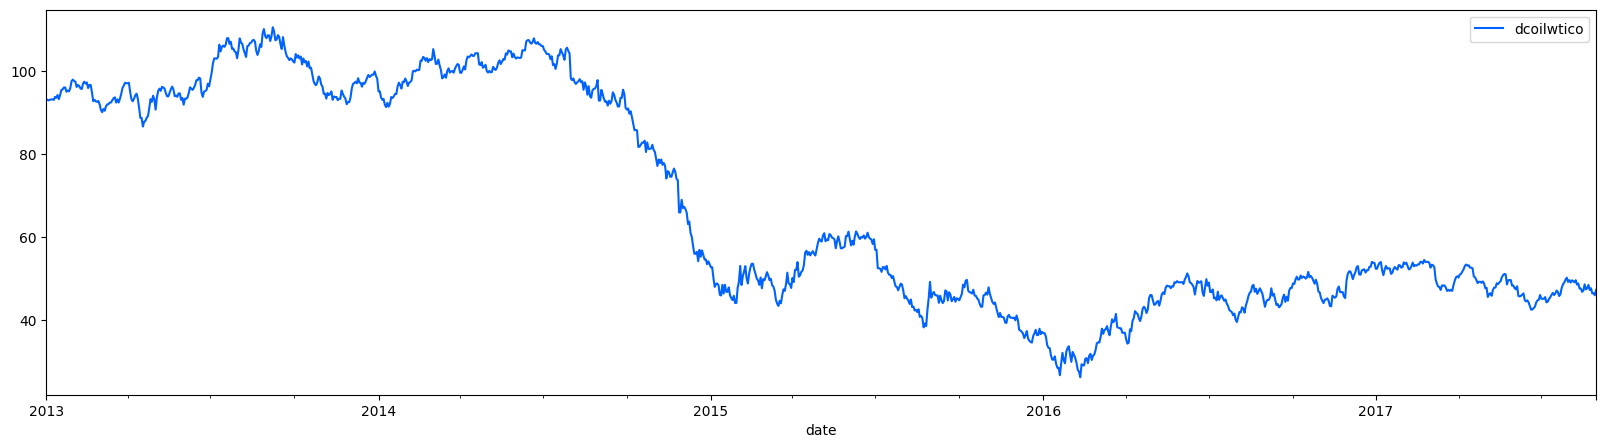

In [45]:
oil_data.set_index('date').plot(figsize=(20,5))

In [46]:
sales_data = pd.merge(sales_data,oil_data,how='left',on='date')
sales_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [47]:
store_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')

In [48]:
store_data

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [49]:
transaction_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
transaction_data[transaction_data['date'] == '2013-01-01']

,date,store_nbr,transactions
0,2013-01-01,25,770


In [50]:
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [51]:
sales_data[(sales_data['date'] == '2013-01-01') & (sales_data['store_nbr'] == 25)]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
561,561,2013-01-01,25,AUTOMOTIVE,0.000000,0,93.14
562,562,2013-01-01,25,BABY CARE,0.000000,0,93.14
563,563,2013-01-01,25,BEAUTY,2.000000,0,93.14
564,564,2013-01-01,25,BEVERAGES,810.000000,0,93.14
565,565,2013-01-01,25,BOOKS,0.000000,0,93.14
566,566,2013-01-01,25,BREAD/BAKERY,180.589000,0,93.14
567,567,2013-01-01,25,CELEBRATION,0.000000,0,93.14
568,568,2013-01-01,25,CLEANING,186.000000,0,93.14
569,569,2013-01-01,25,DAIRY,143.000000,0,93.14
570,570,2013-01-01,25,DELI,71.090000,0,93.14


In [52]:
holiday_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
holiday_events[holiday_events['transferred'] == True]
holiday_events['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [53]:
holiday_events[holiday_events['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


### Holiday Which as 'True' in Transferred Column Should Exclude from holiday events

In [54]:
holiday_matrix = holiday_events[~(holiday_events['transferred'] == True) & ~(holiday_events['type'] == 'Work Day')][['date','type']]

In [55]:
holiday_matrix['date'] = pd.to_datetime(holiday_matrix['date'])

In [56]:
holiday_matrix = holiday_matrix.loc[~holiday_matrix.duplicated(subset=['date'])].reset_index(drop=True)

In [57]:
holiday_matrix

,date,type
0,2012-03-02,Holiday
1,2012-04-01,Holiday
2,2012-04-12,Holiday
3,2012-04-14,Holiday
4,2012-04-21,Holiday
...,...,...
291,2017-12-22,Holiday
292,2017-12-23,Additional
293,2017-12-24,Additional
294,2017-12-25,Holiday


In [58]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 160.3+ MB


In [59]:
sales_data_1 = pd.merge(sales_data,holiday_matrix,how='left',on='date')

In [60]:
sales_data_1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Holiday
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,Holiday
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,Holiday
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Holiday
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,Holiday
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday


In [61]:
sales_data_1.loc[sales_data_1['type'].isnull(),'type'] = 'NoHoliday'

In [62]:
sales_data_1.type.value_counts()

type
NoHoliday     2574990
Holiday        254826
Event           87318
Additional      64152
Transfer        14256
Bridge           5346
Name: count, dtype: int64

In [63]:
sales_data_1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Holiday
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,Holiday
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,Holiday
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Holiday
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,Holiday
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [65]:
sales_data_2 = sales_data_1.copy()

In [66]:
label_encoding = LabelEncoder()
mapping = {}
for i in sales_data_2.columns:
    if sales_data_2[i].dtype == 'object':
        label_encoding.fit(sales_data_2[i])
        sales_data_2[i] = label_encoding.fit_transform(sales_data_2[i])
        print(label_encoding.classes_,label_encoding.transform(label_encoding.classes_))
        mapping[i] = dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
mapping

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
['Additional' 'Bridge' 'Event' 'Holiday' 'NoHoliday' 'Transfer'] [0 1 2 3 4 5]


{'family': {'AUTOMOTIVE': 0,
  'BABY CARE': 1,
  'BEAUTY': 2,
  'BEVERAGES': 3,
  'BOOKS': 4,
  'BREAD/BAKERY': 5,
  'CELEBRATION': 6,
  'CLEANING': 7,
  'DAIRY': 8,
  'DELI': 9,
  'EGGS': 10,
  'FROZEN FOODS': 11,
  'GROCERY I': 12,
  'GROCERY II': 13,
  'HARDWARE': 14,
  'HOME AND KITCHEN I': 15,
  'HOME AND KITCHEN II': 16,
  'HOME APPLIANCES': 17,
  'HOME CARE': 18,
  'LADIESWEAR': 19,
  'LAWN AND GARDEN': 20,
  'LINGERIE': 21,
  'LIQUOR,WINE,BEER': 22,
  'MAGAZINES': 23,
  'MEATS': 24,
  'PERSONAL CARE': 25,
  'PET SUPPLIES': 26,
  'PLAYERS AND ELECTRONICS': 27,
  'POULTRY': 28,
  'PREPARED FOODS': 29,
  'PRODUCE': 30,
  'SCHOOL AND OFFICE SUPPLIES': 31,
  'SEAFOOD': 32},
 'type': {'Additional': 0,
  'Bridge': 1,
  'Event': 2,
  'Holiday': 3,
  'NoHoliday': 4,
  'Transfer': 5}}

In [67]:
sales_data_1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Holiday
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,Holiday
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,Holiday
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Holiday
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,Holiday
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday


In [68]:
sales_data_2

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,0,0.000,0,93.14,3
1,1,2013-01-01,1,1,0.000,0,93.14,3
2,2,2013-01-01,1,2,0.000,0,93.14,3
3,3,2013-01-01,1,3,0.000,0,93.14,3
4,4,2013-01-01,1,4,0.000,0,93.14,3
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,47.57,3
3000884,3000884,2017-08-15,9,29,154.553,1,47.57,3
3000885,3000885,2017-08-15,9,30,2419.729,148,47.57,3
3000886,3000886,2017-08-15,9,31,121.000,8,47.57,3


In [69]:
mapping_df_list = []
for i, j in mapping.items():
    #print(i,j)
    temp_df = pd.DataFrame(list(j.items()), columns=['Original_Value', 'Encoded_Value'])
    temp_df['column_Name'] = i
    mapping_df_list.append(temp_df)
mapping_df_list

[                Original_Value  Encoded_Value column_Name
 0                   AUTOMOTIVE              0      family
 1                    BABY CARE              1      family
 2                       BEAUTY              2      family
 3                    BEVERAGES              3      family
 4                        BOOKS              4      family
 5                 BREAD/BAKERY              5      family
 6                  CELEBRATION              6      family
 7                     CLEANING              7      family
 8                        DAIRY              8      family
 9                         DELI              9      family
 10                        EGGS             10      family
 11                FROZEN FOODS             11      family
 12                   GROCERY I             12      family
 13                  GROCERY II             13      family
 14                    HARDWARE             14      family
 15          HOME AND KITCHEN I             15      fami

In [70]:
temp_df

,Original_Value,Encoded_Value,column_Name
0,Additional,0,type
1,Bridge,1,type
2,Event,2,type
3,Holiday,3,type
4,NoHoliday,4,type
5,Transfer,5,type


In [71]:
label_list = pd.concat(mapping_df_list)

In [72]:
label_list['column_Name'].unique()

array(['family', 'type'], dtype=object)

In [73]:
label_mapping_dict = {}
column_mapping = label_list[label_list['column_Name'] == 'family']
column_mapping
label_mapping_dict['family'] = dict(zip(column_mapping['Original_Value'], column_mapping['Encoded_Value']))

In [74]:
label_mapping_dict

{'family': {'AUTOMOTIVE': 0,
  'BABY CARE': 1,
  'BEAUTY': 2,
  'BEVERAGES': 3,
  'BOOKS': 4,
  'BREAD/BAKERY': 5,
  'CELEBRATION': 6,
  'CLEANING': 7,
  'DAIRY': 8,
  'DELI': 9,
  'EGGS': 10,
  'FROZEN FOODS': 11,
  'GROCERY I': 12,
  'GROCERY II': 13,
  'HARDWARE': 14,
  'HOME AND KITCHEN I': 15,
  'HOME AND KITCHEN II': 16,
  'HOME APPLIANCES': 17,
  'HOME CARE': 18,
  'LADIESWEAR': 19,
  'LAWN AND GARDEN': 20,
  'LINGERIE': 21,
  'LIQUOR,WINE,BEER': 22,
  'MAGAZINES': 23,
  'MEATS': 24,
  'PERSONAL CARE': 25,
  'PET SUPPLIES': 26,
  'PLAYERS AND ELECTRONICS': 27,
  'POULTRY': 28,
  'PREPARED FOODS': 29,
  'PRODUCE': 30,
  'SCHOOL AND OFFICE SUPPLIES': 31,
  'SEAFOOD': 32}}

In [75]:
sales_data_2.drop(columns=['id'],inplace=True)

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [77]:
sales_data_2.set_index('date',inplace=True)

In [78]:
sales_data_2

,store_nbr,family,sales,onpromotion,dcoilwtico,type
date,,,,,,
2013-01-01,1,0,0.000,0,93.14,3
2013-01-01,1,1,0.000,0,93.14,3
2013-01-01,1,2,0.000,0,93.14,3
2013-01-01,1,3,0.000,0,93.14,3
2013-01-01,1,4,0.000,0,93.14,3
...,...,...,...,...,...,...
2017-08-15,9,28,438.133,0,47.57,3
2017-08-15,9,29,154.553,1,47.57,3
2017-08-15,9,30,2419.729,148,47.57,3


<Axes: xlabel='date'>

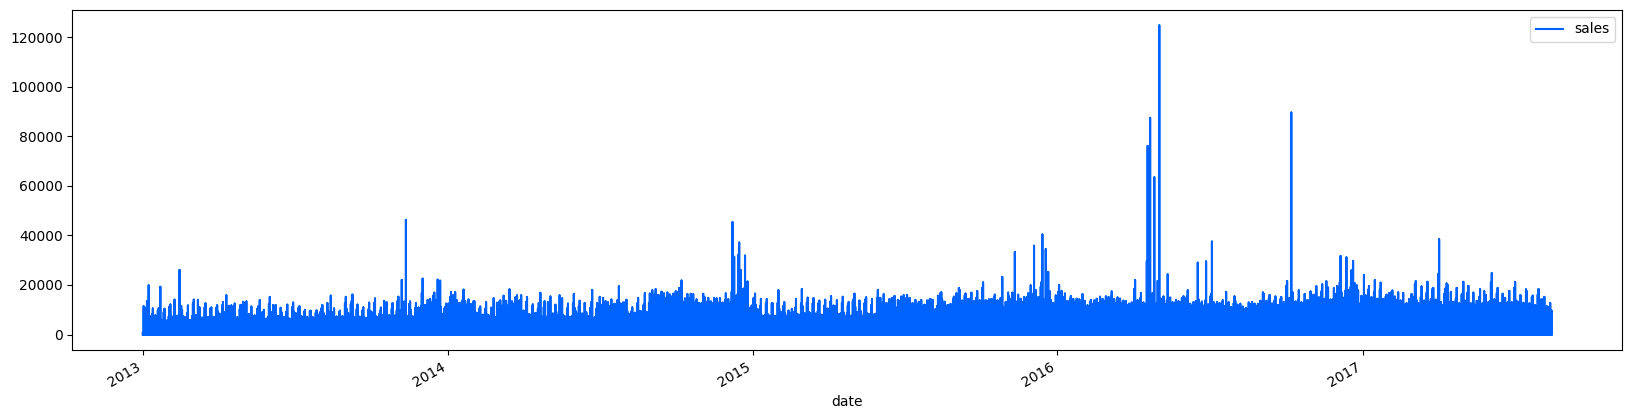

In [79]:
sales_data_2[['sales']].plot(figsize=(20,5))

In [80]:
y_label = sales_data_2['sales']
sales_data_2.drop(columns = 'sales',axis=0,inplace=True)
sales_data_2

,store_nbr,family,onpromotion,dcoilwtico,type
date,,,,,
2013-01-01,1,0,0,93.14,3
2013-01-01,1,1,0,93.14,3
2013-01-01,1,2,0,93.14,3
2013-01-01,1,3,0,93.14,3
2013-01-01,1,4,0,93.14,3
...,...,...,...,...,...
2017-08-15,9,28,0,47.57,3
2017-08-15,9,29,1,47.57,3
2017-08-15,9,30,148,47.57,3


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sales_data_2,y_label,test_size=0.2, shuffle=False)

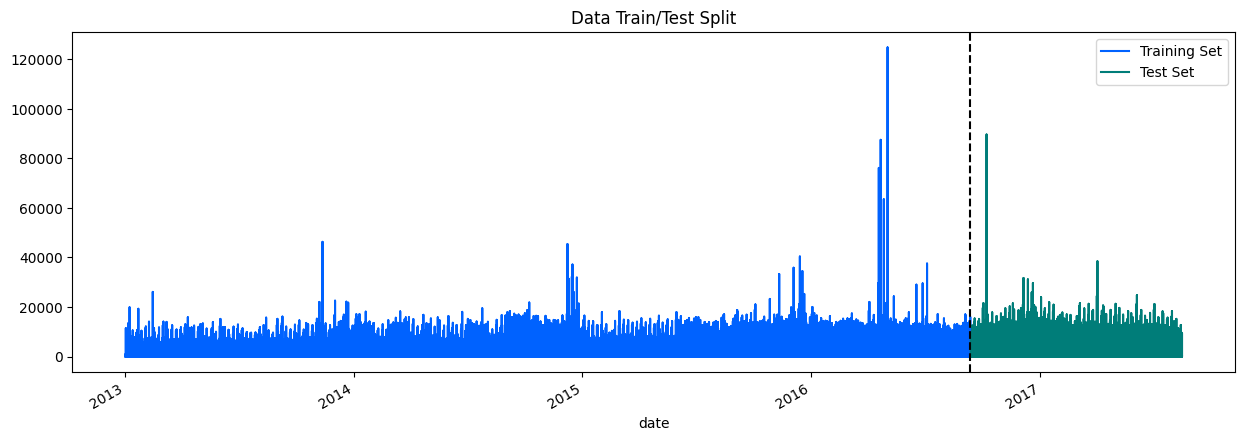

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Set')
ax.axvline('2016-09-11', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [83]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:830.18728	validation_1-rmse:1109.40134
[100]	validation_0-rmse:375.50486	validation_1-rmse:446.74242
[200]	validation_0-rmse:352.79544	validation_1-rmse:439.63611
[281]	validation_0-rmse:342.72121	validation_1-rmse:438.41716


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred = reg.predict(X_test)
#df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
#ax = df[['PJME_MW']].plot(figsize=(15, 5))
#df['prediction'].plot(ax=ax, style='.')
#plt.legend(['Truth Data', 'Predictions'])
#ax.set_title('Raw Dat and Prediction')
#plt.show()

In [85]:
frame = pd.DataFrame({
              'y_test' : y_test,
              'y_pred' : y_pred})

<Axes: xlabel='date'>

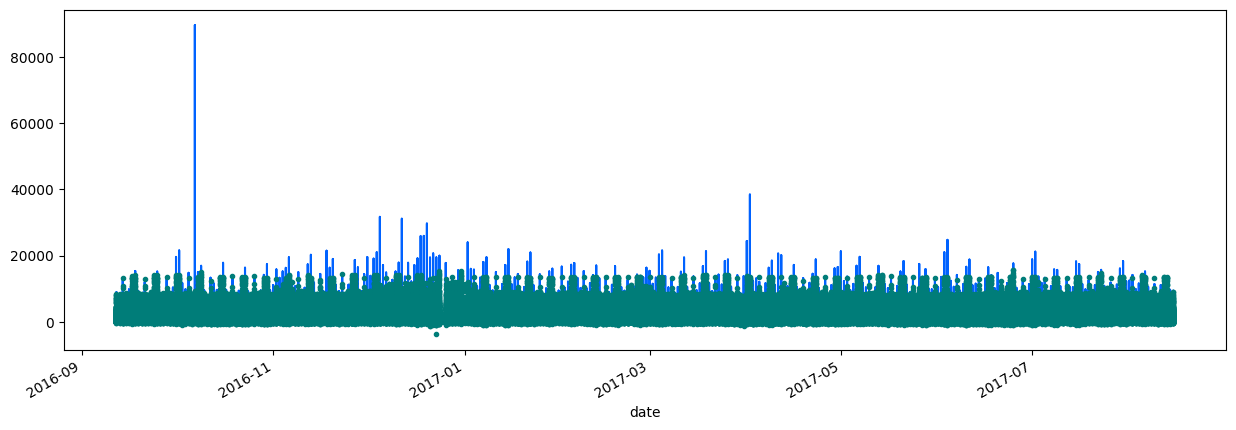

In [86]:
ax = frame['y_test'].plot(figsize=(15, 5))
frame['y_pred'].plot(ax=ax,style='.')

In [87]:
score = np.sqrt(mean_squared_error(frame['y_test'],frame['y_pred']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 436.69


In [88]:
frame['error'] = np.abs(frame['y_test'] - frame['y_pred'])
frame['Date'] = frame.index.date
frame.groupby(['Date'])['error'].mean().sort_values(ascending=False).head(10)

Date
2017-05-01    392.637146
2017-01-02    385.658046
2017-01-01    357.767353
2016-12-23    341.557255
2017-04-01    336.131258
2017-06-04    330.118421
2016-12-21    289.359773
2016-12-22    267.420360
2016-12-26    252.186395
2017-07-02    251.504857
Name: error, dtype: float64

In [89]:
frame.groupby(['Date'])[['error','y_test']].mean().sort_values(by = 'error', ascending=True).head(10)

,error,y_test
Date,,
2016-09-20,82.860140,365.308823
2016-09-14,90.330321,350.315416
2016-11-29,91.126737,362.379634
2016-09-19,91.697398,382.244300
2017-04-06,92.980725,383.310645
2016-09-12,93.136890,408.849245
2016-09-13,93.173723,338.623988
2017-08-09,93.691532,411.975126
2016-09-26,94.093145,372.737060


In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
ohe = OneHotEncoder()

In [92]:
sales_data_3 = sales_data_1.copy()

In [93]:
for column in sales_data_3.columns:
    if sales_data_3[column].dtype == 'object':
        ohe = OneHotEncoder()
        ohe_result = ohe.fit_transform(sales_data_3[[column]]).toarray()
        data_onehot = pd.DataFrame(ohe_result,columns=ohe.get_feature_names_out([column]))
        sales_data_3 = pd.concat([sales_data_3,data_onehot],axis=1)
        

In [94]:
sales_data_3.set_index('date',inplace=True)

In [95]:
sales_data_3.drop(columns = ['family','store_nbr','type'],inplace=True)

In [96]:
y_label = sales_data_3['sales']
sales_data_3.drop(columns = 'sales',axis=0,inplace=True)
sales_data_3

,id,onpromotion,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_Additional,type_Bridge,type_Event,type_Holiday,type_NoHoliday,type_Transfer
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,93.14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,1,0,93.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,2,0,93.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,3,0,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,4,0,93.14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,0,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,3000884,1,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,3000885,148,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
sales_data_3.drop(columns=['id'],inplace=True)

In [98]:
sales_data_3

,onpromotion,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_Additional,type_Bridge,type_Event,type_Holiday,type_NoHoliday,type_Transfer
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,93.14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,0,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,1,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,148,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
sales_data_3

,onpromotion,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_Additional,type_Bridge,type_Event,type_Holiday,type_NoHoliday,type_Transfer
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,93.14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,0,93.14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,0,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,1,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-08-15,148,47.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sales_data_3,y_label,test_size=0.2, shuffle=False)

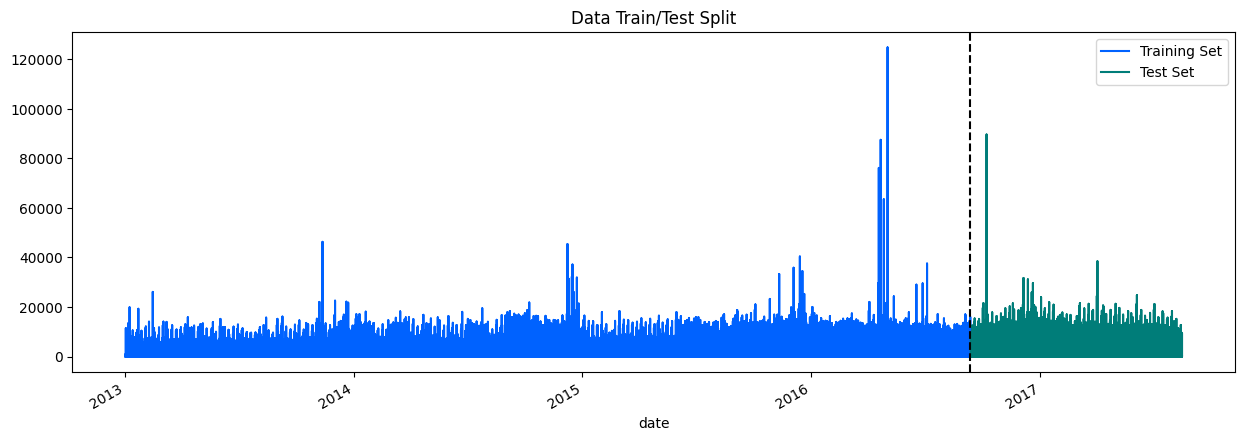

In [102]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Set')
ax.axvline('2016-09-11', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [103]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:860.87892	validation_1-rmse:1105.23347
[55]	validation_0-rmse:639.26589	validation_1-rmse:891.06453


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
y_pred = reg.predict(X_test)
#df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
#ax = df[['PJME_MW']].plot(figsize=(15, 5))
#df['prediction'].plot(ax=ax, style='.')
#plt.legend(['Truth Data', 'Predictions'])
#ax.set_title('Raw Dat and Prediction')
#plt.show()

In [105]:
frame = pd.DataFrame({
              'y_test' : y_test,
              'y_pred' : y_pred})

<Axes: xlabel='date'>

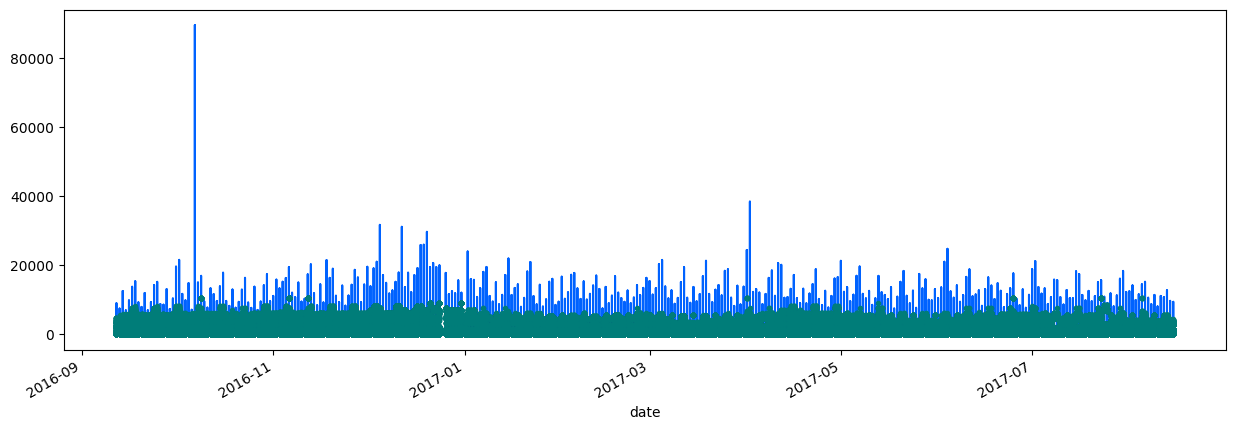

In [106]:
ax = frame['y_test'].plot(figsize=(15, 5))
frame['y_pred'].plot(ax=ax,style='.')

In [107]:
score = np.sqrt(mean_squared_error(frame['y_test'],frame['y_pred']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 843.76


In [108]:
frame['error'] = np.abs(frame['y_test'] - frame['y_pred'])
frame['Date'] = frame.index.date
frame.groupby(['Date'])['error'].mean().sort_values(ascending=False).head(10)

Date
2017-04-01    506.228594
2017-01-02    497.286109
2017-06-04    483.462547
2016-12-18    478.783466
2016-11-06    477.429968
2017-05-01    476.771056
2016-12-04    471.142416
2016-10-02    456.501638
2016-12-11    444.339286
2017-07-02    440.295314
Name: error, dtype: float64

In [109]:
frame.groupby(['Date'])[['error','y_test']].mean().sort_values(by = 'error', ascending=True).head(10)

,error,y_test
Date,,
2016-09-13,212.806278,338.623988
2017-07-13,215.387369,353.339710
2017-03-30,219.742663,357.813884
2017-07-18,220.132054,409.727109
2016-10-25,222.335789,342.643602
2016-09-20,222.846402,365.308823
2017-08-08,222.893335,402.786952
2017-03-09,224.631815,366.947919
2016-10-18,224.694738,353.893710
